In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm import tqdm
import os

from mysystem.dataset import get_data
from mysystem.backtest import Backtest

In [2]:
PATH = './'

In [3]:
data = get_data(PATH)

In [4]:
data.keys()

dict_keys(['date', 'id', 'volume', 'open', 'high', 'low', 'close', 'ret', 'vwap'])

In [5]:
alpha = data['ret'].rolling(5).sum()
alpha[5:].head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,-0.004109,-0.010683,0.000454,0.022483,0.013287,-0.011488,0.016505,0.058365,0.080752,-0.010985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,-0.028440,-0.018001,0.000008,0.006838,-0.003356,-0.013657,0.003071,0.084584,0.129523,-0.006755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,-0.004063,0.005841,0.058203,0.003684,0.013114,-0.017966,0.003085,0.004785,0.074562,0.012275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,-0.022287,-0.011247,0.040807,0.000465,0.002195,-0.018980,-0.002305,-0.057522,0.018036,-0.012133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,-0.008035,-0.037400,0.035720,0.006718,0.014955,-0.009559,-0.002354,-0.092019,0.040447,0.005548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
backtest = Backtest(PATH, '20200101', '20221231')

,ret5d
IC均值,-0.0072
ICIR,-0.0592
rankIC均值,-0.0286
rankICIR,-0.2106
年化收益率,0.1359
年化波动率,0.1299
夏普比率,1.0463
胜率,0.5192


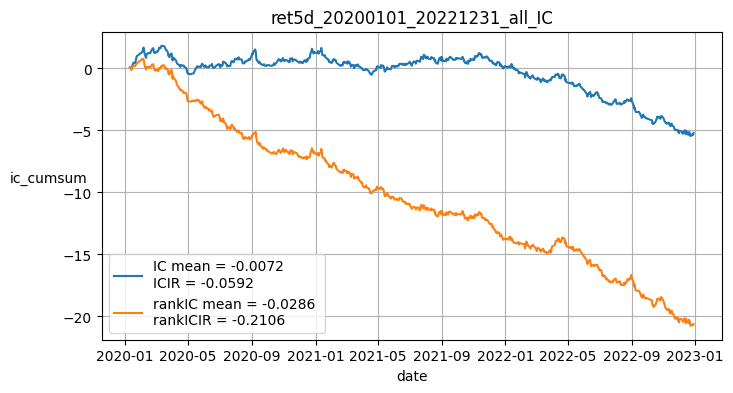

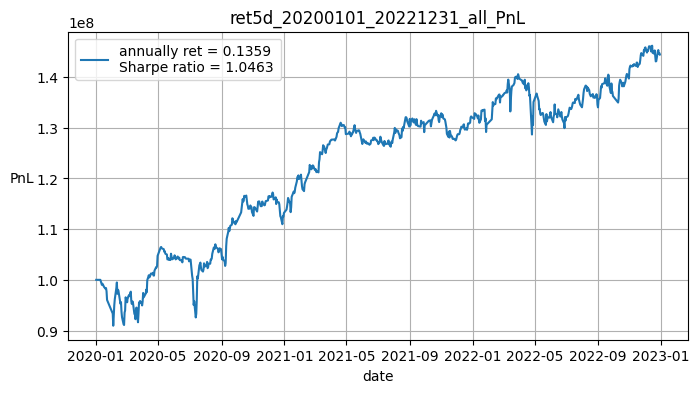

In [7]:
backtest.backtest(alpha, 'ret5d')